## Figure 7

Subpixel convolution can introduce tonal artifacts after initialization. 

In the following, we stack several upsampling layers. Each consecutive layer consists of a convolutional neural network (w/ filters of length 3 and stride of 1) + reshape via the periodic shuffle operation (upsample x2).

Inputs are 4kHz signals: ones, music, or white noise.

In [1]:
sr = 4000
upsample_factor = 2
signal = 'ones' # 'ones' or 'music' or 'random'
use_bias = True

In [2]:
# Importing libraries..
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 80})
plt.rcParams["figure.figsize"] = (18,12)

import librosa
import librosa.display

import torch
import torch.nn
import torch.nn.functional as F

import warnings
warnings.filterwarnings("ignore")

import IPython.display as ipd

In [3]:
# Define main functions..
def shuffle(x, upscale_factor=2):
    batch_size, channels, steps = x.size()
    channels //= upscale_factor
    input_view = x.contiguous().view(batch_size, channels, upscale_factor, steps)
    shuffle_out = input_view.permute(0, 1, 3, 2).contiguous()
    return shuffle_out.view(batch_size, channels, steps * upscale_factor)

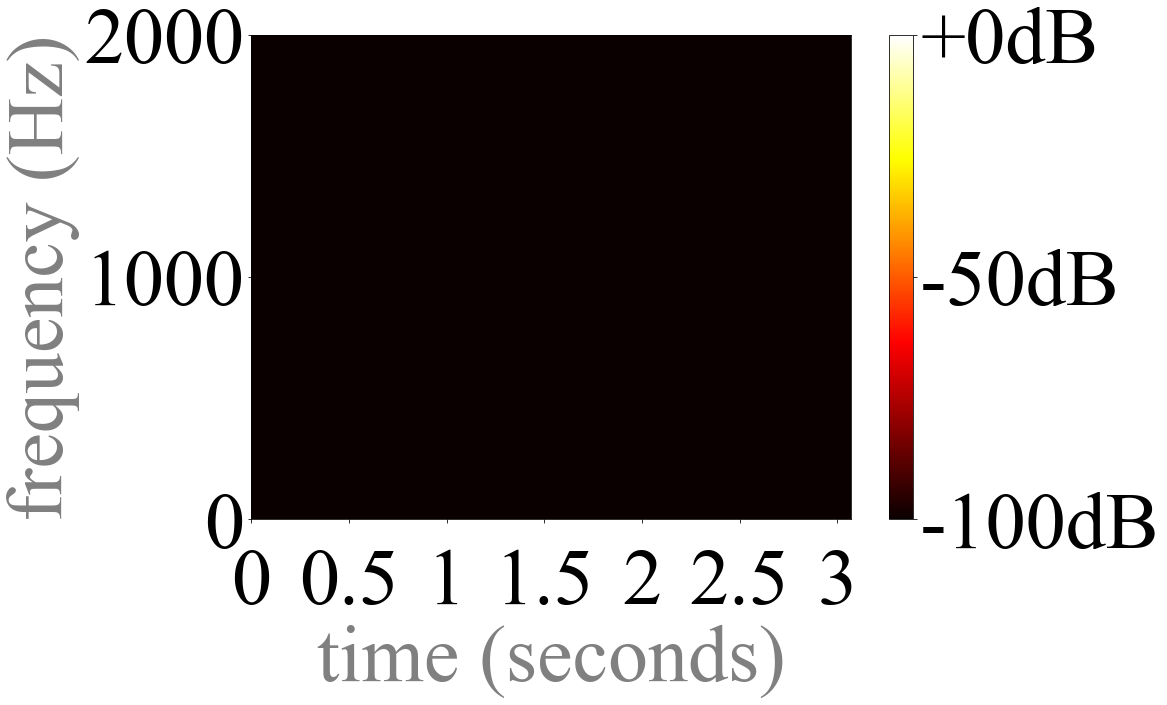

In [4]:
if signal == 'ones':
    # ones input signal: is an empty spectra that allows nice visualizations
    x = torch.ones(sr*3)
    np_x = x.detach().numpy()
elif signal == 'music':
    # music input signal: to use a real signal for testing
    np_x, sr = librosa.load(librosa.util.example_audio_file(), sr=sr)
    np_x = np_x[sr*6:sr*9]
    x = torch.tensor(np_x)
elif signal == 'random':
    # random input signal: to use a white noise signal for testing
    x = torch.rand(sr*3)*2-1
    np_x = x.detach().numpy()

ax = plt.subplot(1,1,1)
ax.tick_params(axis='x', which='major', pad=25)
X = librosa.stft(np_x)
ref=np.max(np.abs(X))
librosa.display.specshow(20*np.log10(np.abs(X)/ref), cmap='hot', sr=sr, y_axis='linear', x_axis='time', vmin=-100, vmax=0)
plt.xticks(np.arange(0,3.5,0.5))
plt.colorbar(format='%+2.fdB')
plt.xlabel('time (seconds)', color="gray")
plt.ylabel('frequency (Hz)', color="gray")
plt.tight_layout()
plt.savefig('PNGs/Fig7_signal.png')

ipd.Audio(x, rate=sr)

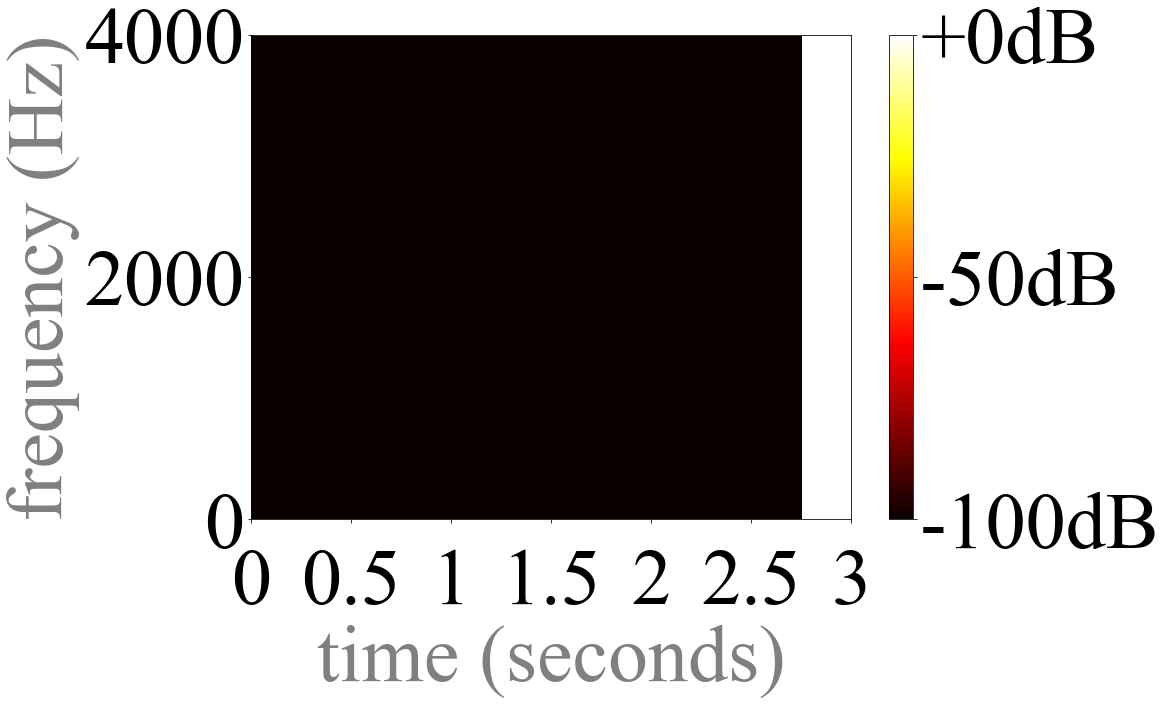

In [5]:
# Let's upsample the signal with more than one subpixel convolution layer!

upsample_conv = torch.nn.Conv1d(1, upsample_factor, 3, stride=1, padding=1, bias=use_bias)

y = upsample_conv(x.view(1,1,-1))
y = shuffle(y, upsample_factor)

np_y = np.squeeze(y.detach().numpy())
Y = librosa.stft(np_y, center=False) # center=False to avoid measuring boundary artifacts due to STFT
ax = plt.subplot(1,1,1)
ax.tick_params(axis='x', which='major', pad=25)
# sr=sr*2 because the signal has been upsampled by two
librosa.display.specshow(20*np.log10(np.abs(Y)/ref), cmap='hot', sr=sr*2, y_axis='linear', x_axis='time', vmin=-100, vmax=0)
plt.colorbar(format='%+2.fdB')
plt.xticks(np.arange(0,3.5,.5))
plt.xlabel('time (seconds)', color="gray")
plt.ylabel('frequency (Hz)', color="gray")
plt.tight_layout()
plt.savefig('PNGs/Fig7_1.png')

ipd.Audio(np_y, rate=sr*2) # sr=sr*2 because the signal has been upsampled by two

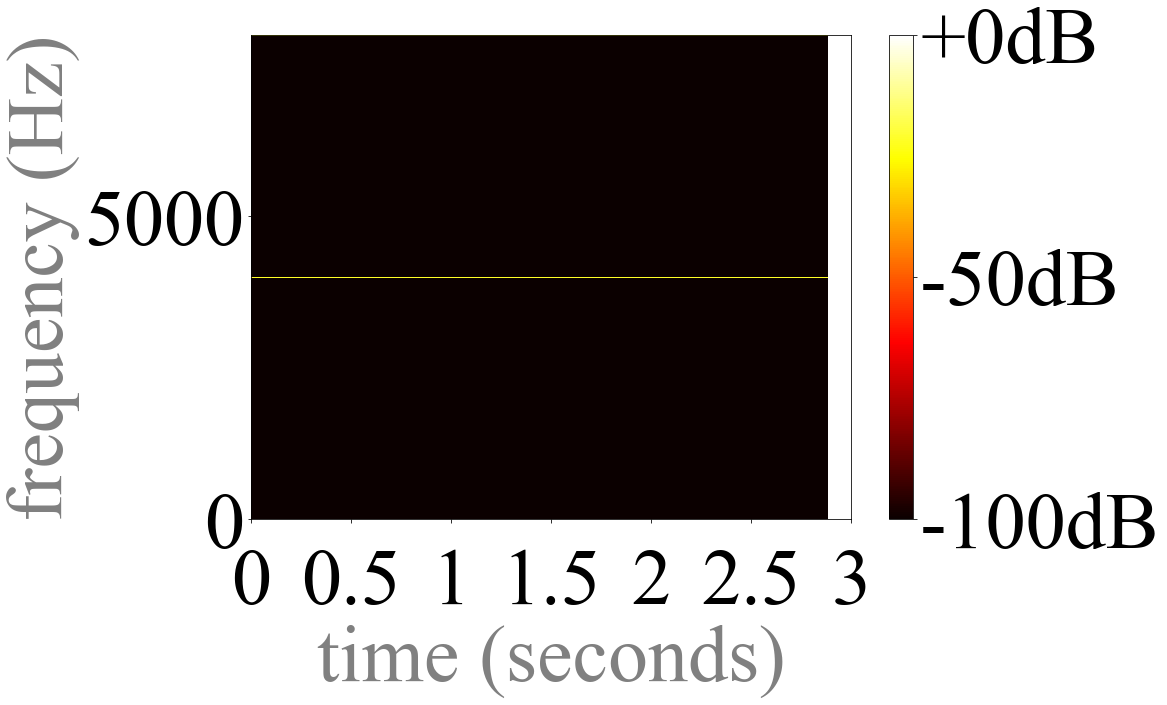

In [6]:
# Let's upsample the signal with more than one subpixel convolution layer!

upsample_conv = torch.nn.Conv1d(1, upsample_factor, 3, stride=1, padding=1, bias=use_bias)

y = upsample_conv(y)
y = shuffle(y, upsample_factor)

np_y = np.squeeze(y.detach().numpy())
Y = librosa.stft(np_y, center=False) # center=False to avoid measuring boundary artifacts due to STFT
ax = plt.subplot(1,1,1)
ax.tick_params(axis='x', which='major', pad=25)
# sr=sr*2*2 because the signal has been upsampled two times (by a factor of two)
librosa.display.specshow(20*np.log10(np.abs(Y)/ref), cmap='hot', sr=sr*2*2, y_axis='linear', x_axis='time', vmin=-100, vmax=0)
plt.colorbar(format='%+2.fdB')
plt.xticks(np.arange(0,3.5,.5))
plt.xlabel('time (seconds)', color="gray")
plt.ylabel('frequency (Hz)', color="gray")
plt.tight_layout()
plt.savefig('PNGs/Fig7_2.png')

ipd.Audio(np_y, rate=sr*2*2) # sr=sr*2*2 because the signal has been upsampled two times (by a factor of two)

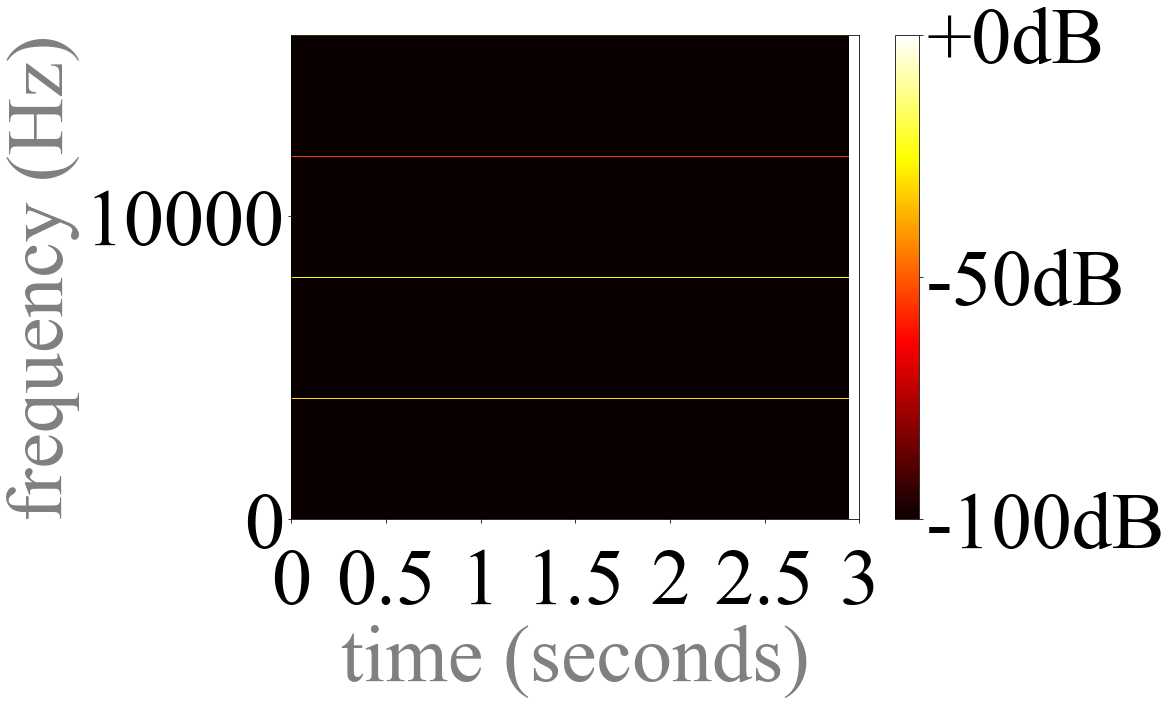

In [7]:
# Let's upsample the signal with more than one subpixel convolution layer!

upsample_conv = torch.nn.Conv1d(1, upsample_factor, 3, stride=1, padding=1, bias=use_bias)

y = upsample_conv(y)
y = shuffle(y, upsample_factor)

np_y = np.squeeze(y.detach().numpy())
Y = librosa.stft(np_y, center=False) # center=False to avoid measuring boundary artifacts due to STFT
ax = plt.subplot(1,1,1)
ax.tick_params(axis='x', which='major', pad=25)
# sr=sr*2*2*2 because the signal has been upsampled three times (by a factor of two)
librosa.display.specshow(20*np.log10(np.abs(Y)/ref), cmap='hot', sr=sr*2*2*2, y_axis='linear', x_axis='time', vmin=-100, vmax=0)
plt.colorbar(format='%+2.fdB')
plt.xticks(np.arange(0,3.5,.5))
plt.xlabel('time (seconds)', color="gray")
plt.ylabel('frequency (Hz)', color="gray")
plt.tight_layout()
plt.savefig('PNGs/Fig7_3.png')

ipd.Audio(np_y, rate=sr*2*2*2) # sr=sr*2*2*2 because the signal has been upsampled three times (by a factor of two)